# Regresión Iterativa

In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline
ri = pd.read_csv("regLinPoli.csv")


In [2]:
X_train, X_test, Y_train, Y_test = train_test_split(ri[['X','X2','X3','X4']], ri[['y']], train_size=0.75)

scaleX = StandardScaler()

scaleY = StandardScaler()

scaleX.fit(X_train)
X_train=scaleX.transform(X_train)
X_test=scaleX.transform(X_test)

scaleY.fit(Y_train)
Y_train=scaleY.transform(Y_train)
Y_test=scaleY.transform(Y_test)

In [5]:
import random
w0i=random.random()
w1i=random.random()
w2i=random.random()
w3i=random.random()
w4i=random.random()

eta=0.06

#lam = [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
import numpy
lam = numpy.arange(0,1,0.05)

error minimo 0.0887610992347
lambda con error minimo 0.05
w's que minimizan el error con lambda 0.05 : [ 0.04070906] [ 0.34855986] [ 0.40878686] [-0.00207094] [ 0.06296419]


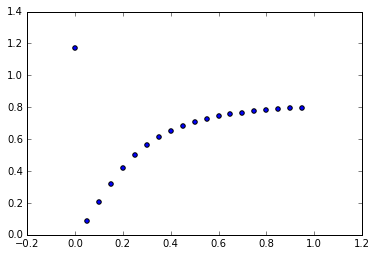

In [6]:
error_i = 0.0
datos = []
errores = []
errores_lam = []
lambdas = []
ws = []


for x in range(len(lam)):
   
    for i in range(len(X_train)):
        y_est = w0i + w1i*X_train[i][0]+ w2i*X_train[i][1]+ w3i*X_train[i][2]+ w4i*X_train[i][3]
        error_i = Y_train[i] - y_est
        w0i = w0i + error_i*eta
        w1i = w1i + error_i*eta*X_train[i][0] - lam[x]*(w1i)
        w2i = w2i + error_i*eta*X_train[i][1] - lam[x]*(w2i)
        w3i = w3i + error_i*eta*X_train[i][2] - lam[x]*(w3i)
        w4i = w4i + error_i*eta*X_train[i][3] - lam[x]*(w4i)
        datos.append(i)
        errores.append(error_i)
        
    #print "w0:  ",float(w0i)
    #print "w1:  ",float(w1i)
    #print "w2:  ",float(w2i)
    #print "w3:  ",float(w3i)
    #print "w4:  ",float(w4i)
    
    

    lambdas.append(lam[x])
    ws.append(w0i),
    ws.append(w1i),
    ws.append(w2i),
    ws.append(w3i)
    ws.append(w4i)
    errores3 = [( w0i + w1i*X_test[i][0]+ w2i*X_test[i][1]+ w3i*X_test[i][2]+ w4i*X_test[i][3] -Y_test[i] )**2 for i in range(len(X_test))]
    errores3 = numpy.mean(errores3)
    errores_lam.append(errores3)

    
#print errores_lam
print "error minimo", min(errores_lam)
a = errores_lam.index(min(errores_lam))
print "lambda con error minimo",lambdas[a]
print "w's que minimizan el error con lambda", lambdas[a],":", ws[a*5],ws[(a*5)+1],ws[(a*5)+2],ws[(a*5)+3],ws[(a*5)+4]

#print ws
plt.scatter(lam,errores_lam)